<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
df = pd.read_csv('/content/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
df.shape

(2290, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [23]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [26]:
corr = df.drop('Date', axis=1).corr()

<Axes: >

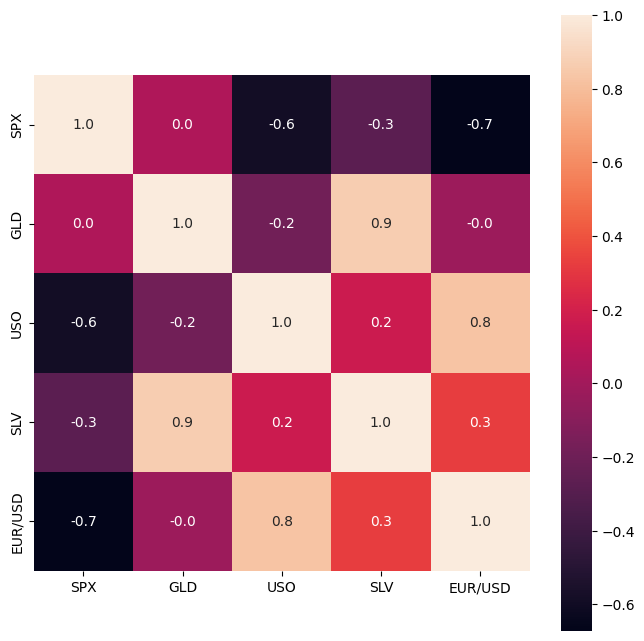

In [27]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True)

In [28]:
# correlation values of GLD
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


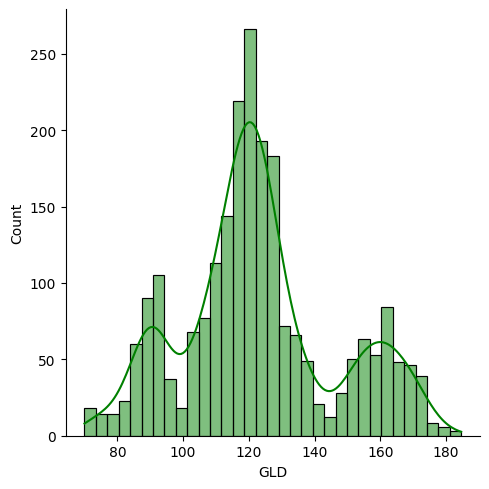

In [31]:
# checking the distribution of the GLD Price
sns.displot(df['GLD'],color='green', kde=True)

Splitting the Features and Target

In [32]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [33]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size = 0.2, random_state=3)

In [34]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [35]:
# prediction on Test Data
test_data_prediction = model.predict(X_test)

In [36]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9764337804959411


In [37]:
# prediction on Train Data
train_data_prediction = model.predict(X_train)
train_error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared error : ", train_error_score)

R squared error :  0.996925846889425


Compare the Actual Values and Predicted Values in a Plot

In [38]:
Y_test = list(Y_test)

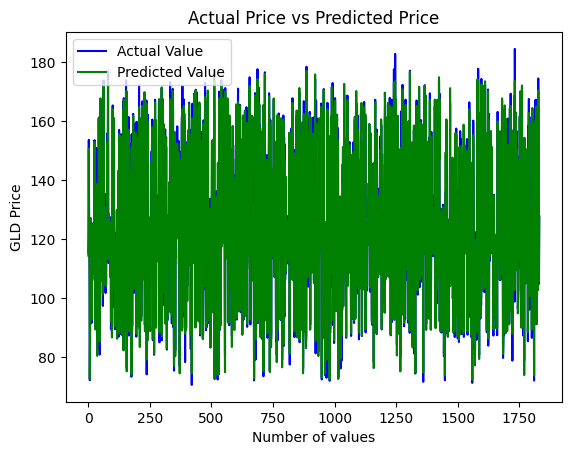

In [39]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [40]:
# Sample data for prediction (SPX, USO, SLV, EUR/USD)
sample_data = {'SPX': [1500], 'USO': [20], 'SLV': [18], 'EUR/USD': [1.2]}
sample_df = pd.DataFrame(sample_data)

# Make prediction
predicted_gld_price = model.predict(sample_df)

print(f"Predicted GLD Price for the sample data: {predicted_gld_price[0]:.2f}")

Predicted GLD Price for the sample data: 110.41
